# **Stroke Survival Prediction**
### What are the potential outcomes of someone experiencing an acute stroke at the end of a 6-month period?

In [1]:
# Import required dependencies
import pandas as pd
import pipeline_utilities as util
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaned Sourcing
#### The cleaning prosses was documented in a seperate file.
 1. Handel missing values.
 2. Handel dublicates rows.
 3. Replacing nan values.
 4. Droping columns.


In [2]:
# Importing the data
stroke_trials_df = pd.read_csv("/content/six_month_dead_alive_data.csv")
stroke_trials_df

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RSBP,RCONSC,RDEF1,RDEF2,...,DHAEMD,DTHROMB,DNOSTRK,DRSISC,DRSH,DRSUNK,DPE,DALIVE,CNTRYNUM,OCCODE
0,F,78,N,C,Y,Y,118,F,Y,Y,...,N,N,N,N,N,U,N,N,14,1
1,F,65,N,C,Y,N,170,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
2,M,54,N,C,Y,Y,153,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
3,F,77,N,C,Y,N,142,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
4,F,77,N,C,Y,Y,130,F,Y,N,...,N,N,N,N,N,U,N,Y,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,F,86,N,Y,N,N,120,F,Y,Y,...,N,N,N,N,N,N,N,Y,27,1
9401,M,63,Y,N,Y,Y,150,F,Y,Y,...,N,N,N,N,N,N,N,Y,15,1
9402,M,66,N,N,Y,Y,120,F,Y,Y,...,N,N,N,N,N,N,N,N,27,1
9403,M,77,N,N,Y,N,220,F,Y,Y,...,N,N,N,Y,N,N,N,Y,15,1


# Data Exploration and Transformation
* Encoding categorical variables.
* Using statical methods.
* Checking the correlated features.





In [3]:
# Printing the data info
print(stroke_trials_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       9405 non-null   object 
 1   AGE       9405 non-null   int64  
 2   RSLEEP    9405 non-null   object 
 3   RATRIAL   9405 non-null   object 
 4   RCT       9405 non-null   object 
 5   RVISINF   9405 non-null   object 
 6   RSBP      9405 non-null   int64  
 7   RCONSC    9405 non-null   object 
 8   RDEF1     9405 non-null   object 
 9   RDEF2     9405 non-null   object 
 10  RDEF3     9405 non-null   object 
 11  RDEF4     9405 non-null   object 
 12  RDEF5     9405 non-null   object 
 13  RDEF6     9405 non-null   object 
 14  RDEF7     9405 non-null   object 
 15  RDEF8     9405 non-null   object 
 16  STYPE     9405 non-null   object 
 17  RXASP     9405 non-null   object 
 18  DASP14    9405 non-null   object 
 19  DASPLT    9405 non-null   object 
 20  ONDRUG    9405 non-null   floa

In [4]:
# Displaying the names of all columns
print(stroke_trials_df.columns)

Index(['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RSBP', 'RCONSC',
       'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8',
       'STYPE', 'RXASP', 'DASP14', 'DASPLT', 'ONDRUG', 'DAP', 'DOAC', 'DGORM',
       'DSTER', 'DCAA', 'DMAJNCH', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DCAREND',
       'DHAEMD', 'DTHROMB', 'DNOSTRK', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE',
       'DALIVE', 'CNTRYNUM', 'OCCODE'],
      dtype='object')


#### Encoding Categorical Variables.

In [5]:
# converting categorical values to numerical values using LabelEncoder
label_encoder = LabelEncoder()
columns = stroke_trials_df.columns
for col in columns:
    if stroke_trials_df[col].dtype == 'object':
        stroke_trials_df[col] = label_encoder.fit_transform(stroke_trials_df[col])

In [6]:
# checking data type
print(stroke_trials_df.dtypes)

SEX           int64
AGE           int64
RSLEEP        int64
RATRIAL       int64
RCT           int64
RVISINF       int64
RSBP          int64
RCONSC        int64
RDEF1         int64
RDEF2         int64
RDEF3         int64
RDEF4         int64
RDEF5         int64
RDEF6         int64
RDEF7         int64
RDEF8         int64
STYPE         int64
RXASP         int64
DASP14        int64
DASPLT        int64
ONDRUG      float64
DAP           int64
DOAC          int64
DGORM         int64
DSTER         int64
DCAA          int64
DMAJNCH       int64
DDIAGISC      int64
DDIAGHA       int64
DDIAGUN       int64
DCAREND       int64
DHAEMD        int64
DTHROMB       int64
DNOSTRK       int64
DRSISC        int64
DRSH          int64
DRSUNK        int64
DPE           int64
DALIVE        int64
CNTRYNUM      int64
OCCODE        int64
dtype: object


In [7]:
# Printing each column unique values and how many times it appears
for col in stroke_trials_df.columns:
  print(f'Value counts in {col}: {stroke_trials_df[col].value_counts()}')

Value counts in SEX: SEX
1    5010
0    4395
Name: count, dtype: int64
Value counts in AGE: AGE
74    377
80    369
75    357
81    355
76    350
     ... 
26      2
99      1
19      1
20      1
21      1
Name: count, Length: 79, dtype: int64
Value counts in RSLEEP: RSLEEP
0    6635
1    2770
Name: count, dtype: int64
Value counts in RATRIAL: RATRIAL
1    7482
2    1553
0     370
Name: count, dtype: int64
Value counts in RCT: RCT
1    6051
0    3354
Name: count, dtype: int64
Value counts in RVISINF: RVISINF
0    6409
1    2996
Name: count, dtype: int64
Value counts in RSBP: RSBP
160    1180
140    1123
150    1101
170     885
180     879
       ... 
226       1
217       1
295       1
238       1
223       1
Name: count, Length: 145, dtype: int64
Value counts in RCONSC: RCONSC
1    7233
0    2055
2     117
Name: count, dtype: int64
Value counts in RDEF1: RDEF1
2    6777
1    2492
0     136
Name: count, dtype: int64
Value counts in RDEF2: RDEF2
2    8033
1    1306
0      66
Name: count

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Statical summary of the dataset using describe function.
stroke_trials_df.describe(include='all')

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RSBP,RCONSC,RDEF1,RDEF2,...,DHAEMD,DTHROMB,DNOSTRK,DRSISC,DRSH,DRSUNK,DPE,DALIVE,CNTRYNUM,OCCODE
count,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,...,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000
mean,0.532695,71.868687,0.294524,1.125784,0.643381,0.318554,160.349495,0.793939,1.706114,1.847103,...,0.029984,0.000532,0.026582,0.016906,0.005104,0.068368,0.005529,0.535779,21.237746,0.781818
std,0.498956,11.659427,0.455853,0.434355,0.479026,0.465940,27.966784,0.434166,0.486275,0.378906,...,0.170552,0.023052,0.160866,0.128926,0.071261,0.303993,0.074155,0.498745,8.329203,0.413033
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,65.000000,0.000000,1.000000,0.000000,0.000000,140.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000
50%,1.000000,74.000000,0.000000,1.000000,1.000000,0.000000,160.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,1.000000
max,1.000000,99.000000,1.000000,2.000000,1.000000,1.000000,295.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,44.000000,1.000000


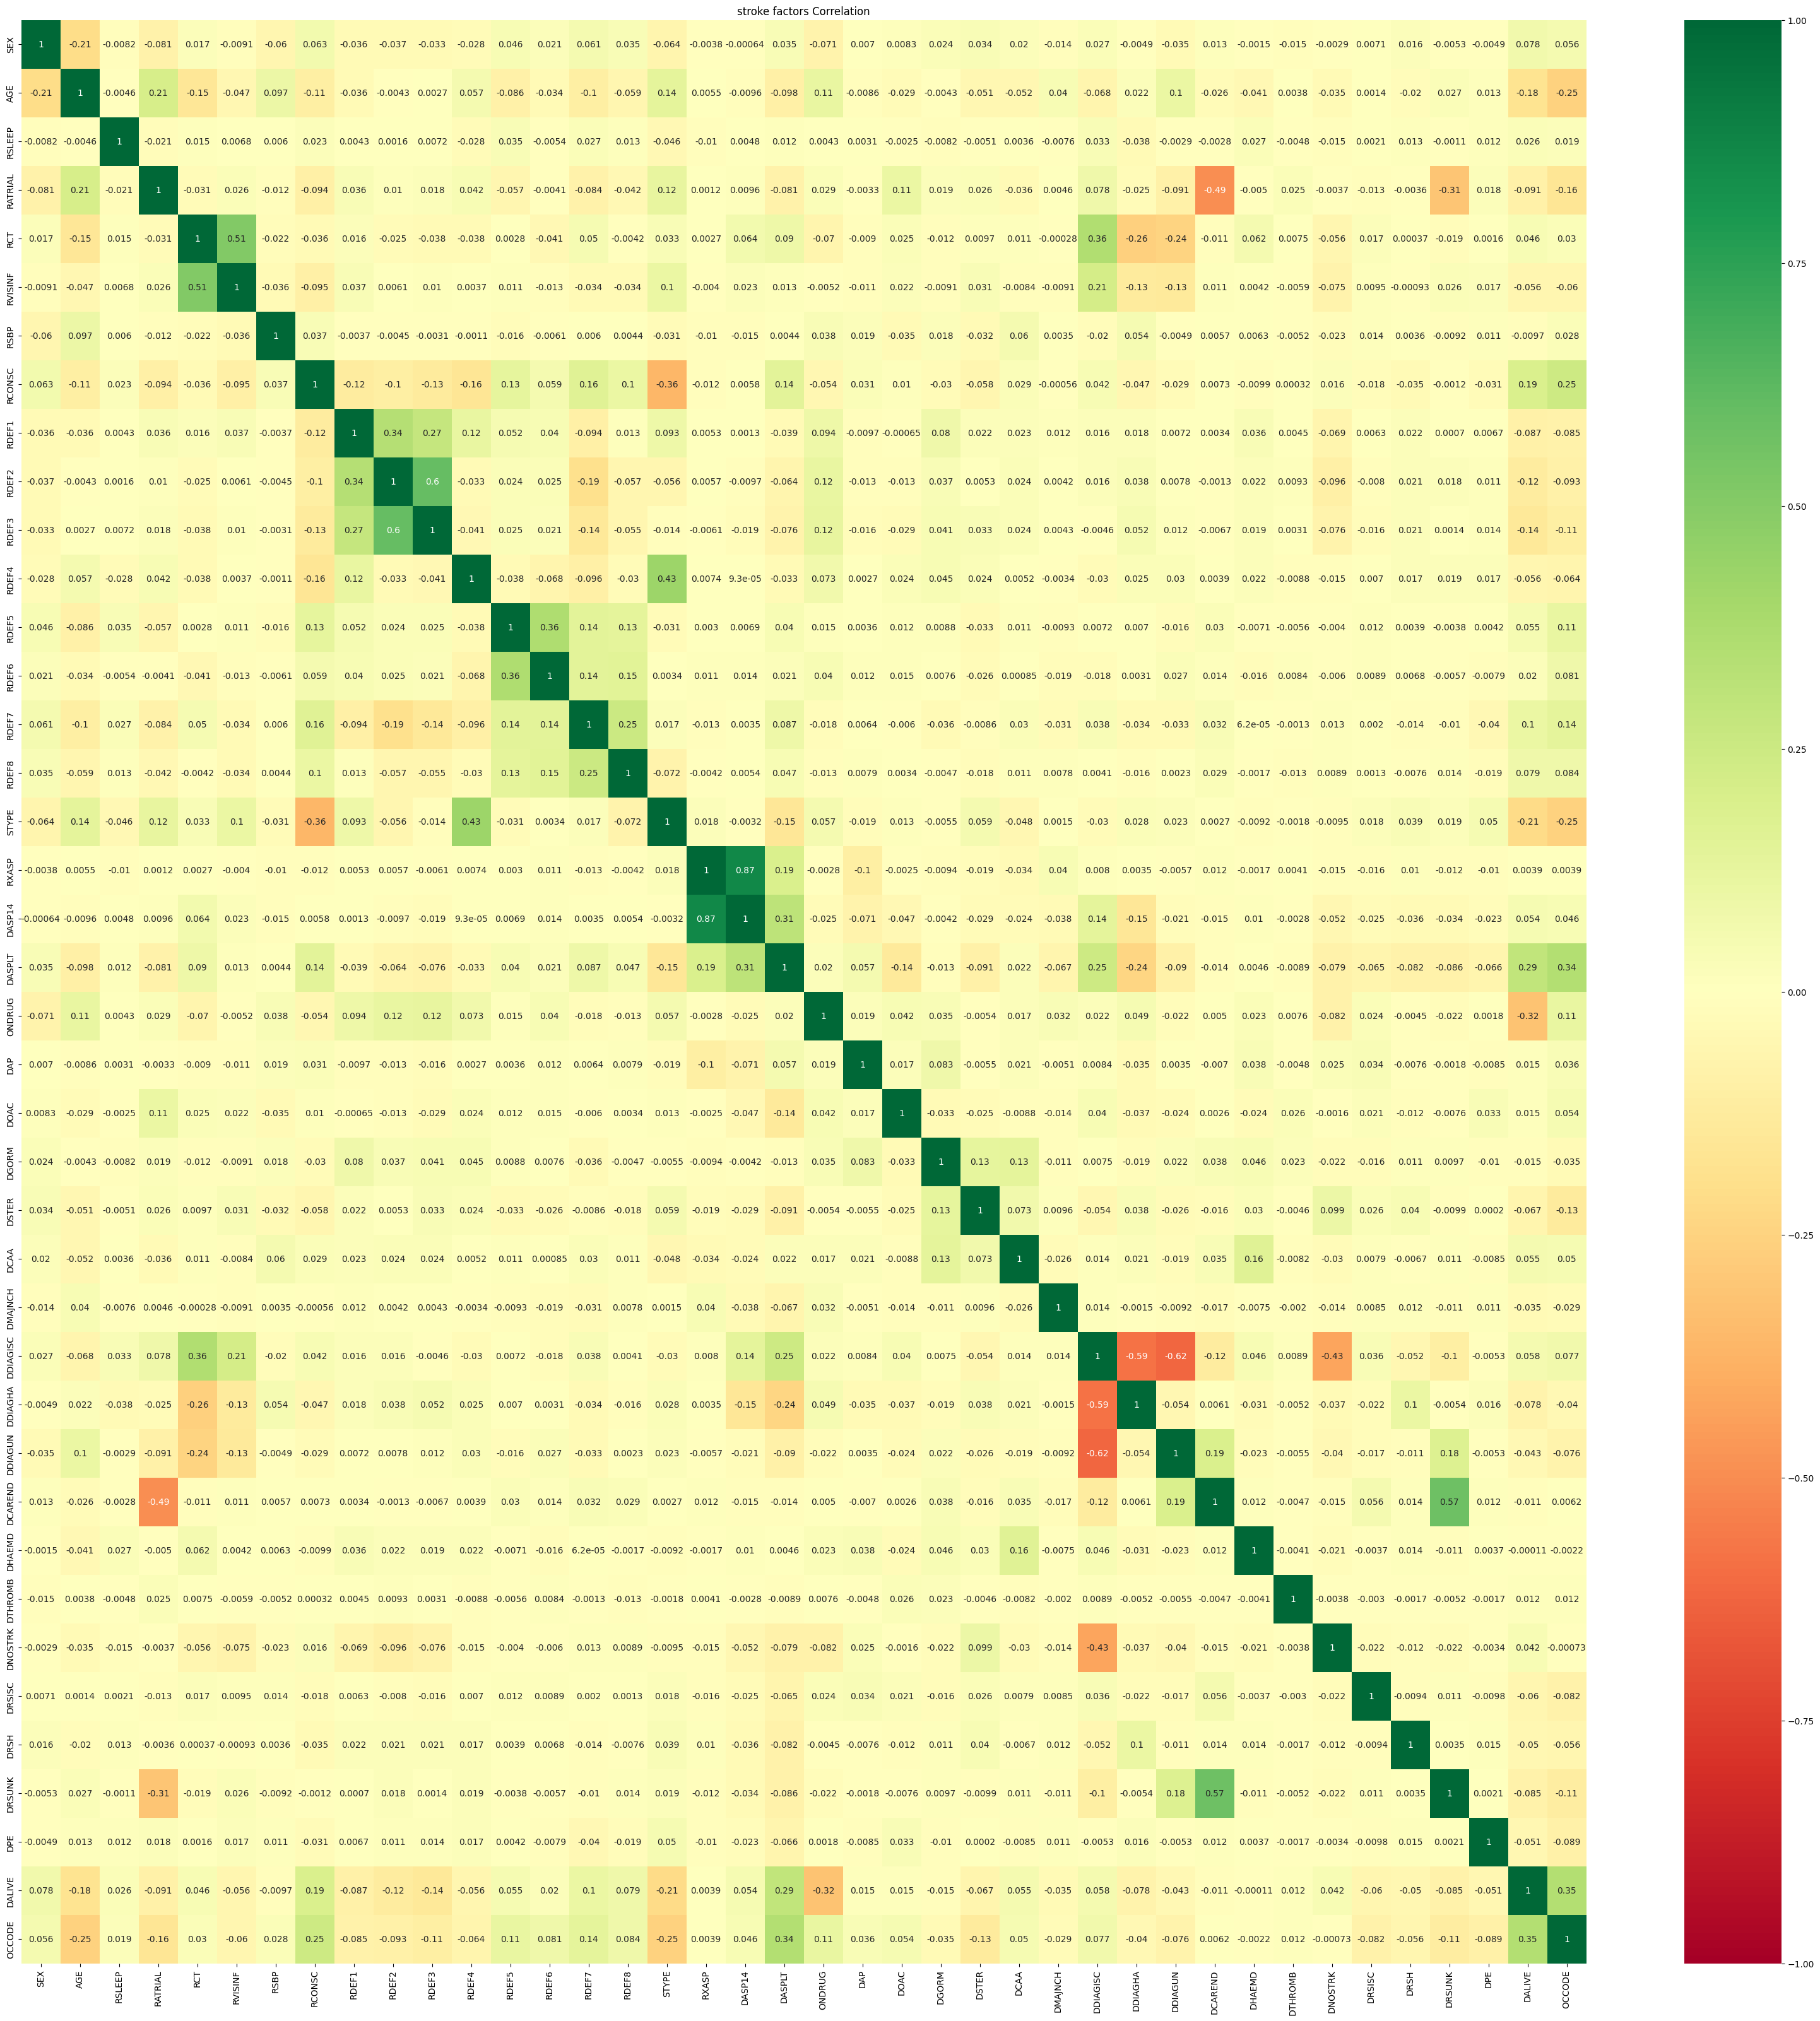

In [10]:
# Checking the correlation between all columns
corr_stroke_factors= stroke_trials_df[['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RSBP', 'RCONSC',
       'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8',
       'STYPE', 'RXASP', 'DASP14', 'DASPLT', 'ONDRUG', 'DAP', 'DOAC', 'DGORM',
       'DSTER', 'DCAA', 'DMAJNCH', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DCAREND',
       'DHAEMD', 'DTHROMB', 'DNOSTRK', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE',
       'DALIVE', 'OCCODE']].corr()
fig = plt.figure(figsize = (40,40))
sns.heatmap(corr_stroke_factors, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('stroke factors Correlation')
plt.show()


In [11]:
# Checking the correlation between OCCODE column and the rest ofcolumns
OCCODE_correlations = stroke_trials_df.corr()['OCCODE']
# Display correlation with other columns
print(OCCODE_correlations)

SEX         0.056290
AGE        -0.254166
RSLEEP      0.018843
RATRIAL    -0.158787
RCT         0.030215
RVISINF    -0.060409
RSBP        0.027877
RCONSC      0.245594
RDEF1      -0.085269
RDEF2      -0.092914
RDEF3      -0.107996
RDEF4      -0.064015
RDEF5       0.111468
RDEF6       0.080542
RDEF7       0.135912
RDEF8       0.084172
STYPE      -0.254674
RXASP       0.003886
DASP14      0.045604
DASPLT      0.344182
ONDRUG      0.114826
DAP         0.036170
DOAC        0.054468
DGORM      -0.035028
DSTER      -0.130824
DCAA        0.050352
DMAJNCH    -0.028718
DDIAGISC    0.076860
DDIAGHA    -0.039558
DDIAGUN    -0.076355
DCAREND     0.006232
DHAEMD     -0.002223
DTHROMB     0.012184
DNOSTRK    -0.000727
DRSISC     -0.082491
DRSH       -0.056098
DRSUNK     -0.114934
DPE        -0.089069
DALIVE      0.350204
CNTRYNUM   -0.068903
OCCODE      1.000000
Name: OCCODE, dtype: float64


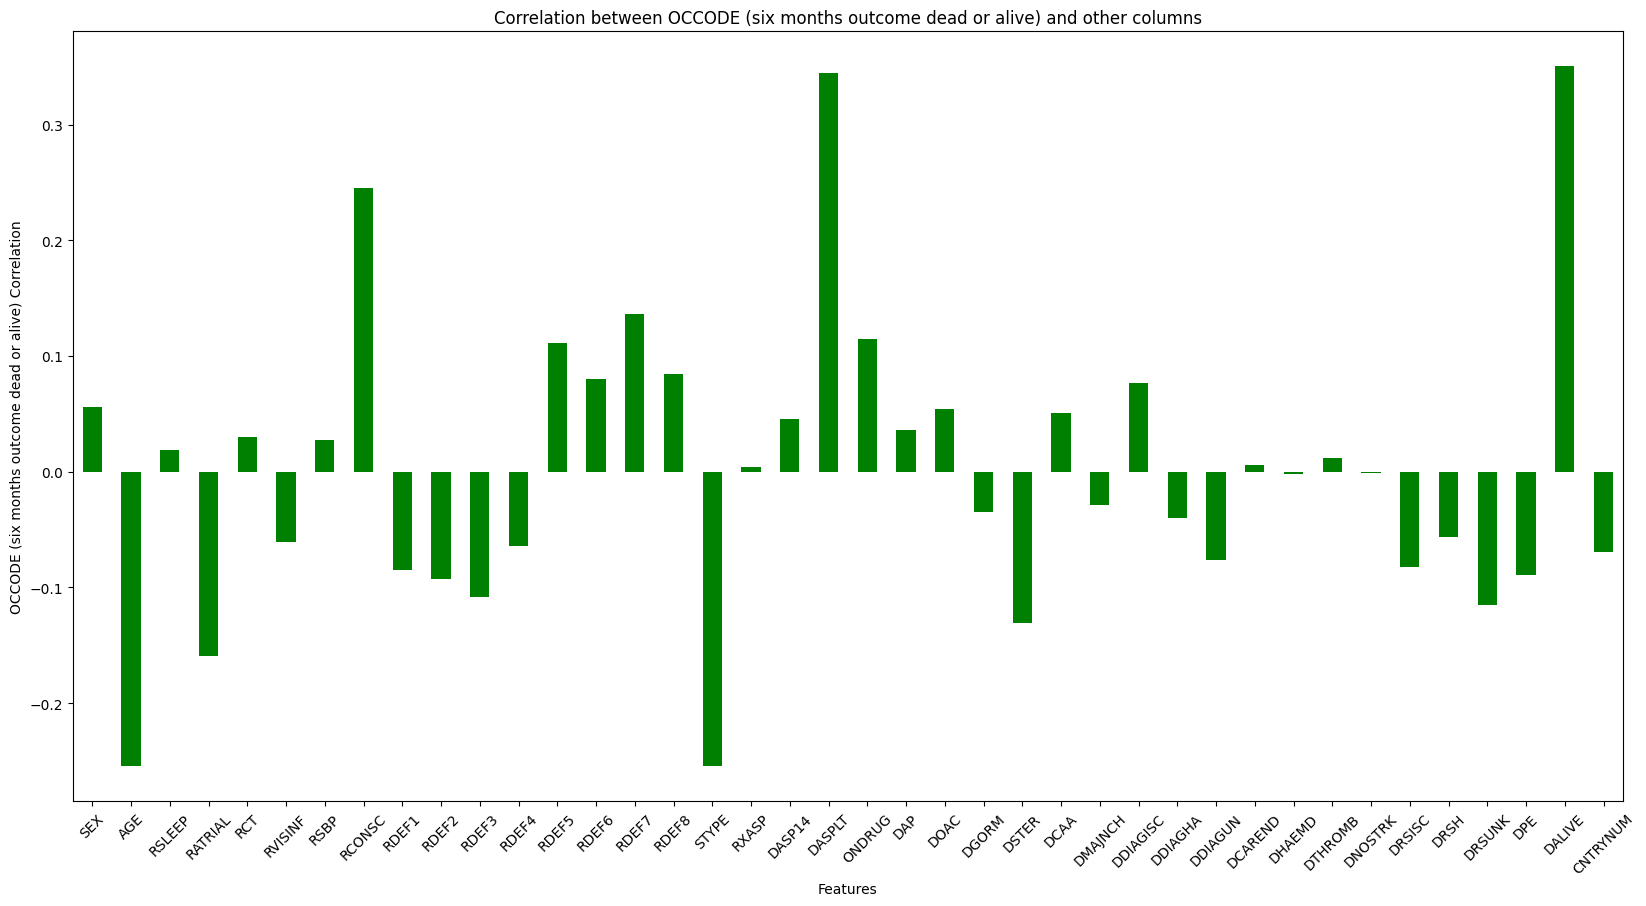

In [12]:
# Plotting the correlation between OCCODE column and the rest of columns
OCCODE_correlations.drop('OCCODE').plot(kind='bar', color ='green', figsize=(20, 10))
plt.xlabel('Features')
plt.ylabel('OCCODE (six months outcome dead or alive) Correlation')
plt.title('Correlation between OCCODE (six months outcome dead or alive) and other columns')
plt.xticks(rotation=45)
plt.show()

#Data analysis

##Models training and testing
  





In [13]:
# Generate models for the dataset and find the best one
model = util.stroke_model_generator(stroke_trials_df.copy(), 'OCCODE')

LogisticRegression()
Mean Squared Error: 0.13818027210884354
R-squared: 0.8594280312730891
Balanced Accuracy: 0.7213824728260869
Accuracy: 0.8618197278911565
Cross Val Score: 0.17851527905379128

SVC()
Mean Squared Error: 0.14668367346938777
R-squared: 0.8507774485822023
Balanced Accuracy: 0.6933933423913043
Accuracy: 0.8533163265306123
Cross Val Score: 0.0961030549830739

KNeighborsClassifier()
Mean Squared Error: 0.18154761904761904
R-squared: 0.8153100595495663
Balanced Accuracy: 0.6548997961956522
Accuracy: 0.8184523809523809
Cross Val Score: -0.15090517633815864

DecisionTreeClassifier()
Mean Squared Error: 0.1989795918367347
R-squared: 0.7975763650332482
Balanced Accuracy: 0.7015540081521738
Accuracy: 0.8010204081632653
Cross Val Score: -0.20856032577657477

RandomForestClassifier()
Mean Squared Error: 0.13095238095238096
R-squared: 0.8667810265603428
Balanced Accuracy: 0.7231827445652175
Accuracy: 0.8690476190476191
Cross Val Score: 0.22345874821013254

ExtraTreesClassifier()
Me

## Model Optimization : Training and Testing the Model (Gradient Boosting Classifier)
#### Hyperparameter Tuning

In [14]:
# Define features and target
X = stroke_trials_df.drop('OCCODE', axis=1)
y = stroke_trials_df['OCCODE']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Encode the data
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [17]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [18]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the parameters
param_grid = {
    "learning_rate": [0.065, 0.075, 0.085],
    "max_depth":[3, 5],
    "subsample":[0.5, 1],
    "n_estimators":[250, 400]
}


In [20]:
# Create the GridSearchCV model
grid_tuned_model = GradientBoostingClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)

In [21]:
# Fit the GridSearchCV model
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.867 total time=   2.1s
[CV 2/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.855 total time=   2.3s
[CV 3/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.872 total time=   1.8s
[CV 4/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.871 total time=   1.6s
[CV 5/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.874 total time=   1.6s
[CV 1/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.865 total time=   2.3s
[CV 2/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.853 total time=   2.3s
[CV 3/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.877 total time=   3.0s
[CV 4/5] END learning_rate=0.065, max_depth=3, n

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.065, 0.075, 0.085],
                         'max_depth': [3, 5], 'n_estimators': [250, 400],
                         'subsample': [0.5, 1]},
             verbose=3)

In [22]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'learning_rate': 0.065, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.5}


In [23]:
# Get the score for the GridSearchCV model
grid_clf.score(X_test_scaled, y_test)

0.8715986394557823

In [24]:
# Check the metrics for the GridSearchCV model
util.check_metrics(X_test_scaled, y_test, grid_clf.best_estimator_)

Mean Squared Error: 0.1284013605442177
R-squared: 0.869376201367609
Balanced Accuracy: 0.7367951766304348
Accuracy: 0.8715986394557823
Cross Val Score: 0.17098345458909614



0.869376201367609

### Measuring Accuracy Using Cross-validation

In [25]:
# Importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [26]:
# Calculate the accuracy for the model
cross_val_score = cross_val_score(grid_clf.best_estimator_, X_train_scaled, y_train, cv=3)
cross_val_score


array([0.85623139, 0.87026797, 0.87537218])

## Evaluate the Perforance of the Model

#### Confusion Matrix

In [28]:
# Getting a clean prediction for each instance in the training set
y_train_pred = cross_val_predict(grid_clf.best_estimator_, X_train_scaled, y_train, cv=3)
y_train_pred


array([1, 1, 1, ..., 1, 1, 1])

In [29]:
# Create the confusion matrix
confusion_matrix(y_train, y_train_pred, labels = [1,0])

array([[5252,  261],
       [ 688,  852]])

#### Classification Report

In [30]:
# Create a classification report
print(classification_report(y_train, y_train_pred, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.88      0.95      0.92      5513
           0       0.77      0.55      0.64      1540

    accuracy                           0.87      7053
   macro avg       0.82      0.75      0.78      7053
weighted avg       0.86      0.87      0.86      7053

